In [1]:
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.stattools import acf


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load in the final dataset.
data = pd.read_csv('Jan29_to_Feb26.csv',index_col=0)
data = data[data.station == "ATHENRY"]
data.index = pd.to_datetime(data.date) # make date as index
data = data[['avg_wind_pwr']]
data

avg_wind_pwr
date                             
2017-01-29 00:00:00        491.75
2017-01-29 01:00:00        514.25
2017-01-29 02:00:00        419.75
2017-01-29 03:00:00        390.50
2017-01-29 04:00:00        394.25
...                           ...
2017-02-26 19:00:00       1606.50
2017-02-26 20:00:00       1553.50
2017-02-26 21:00:00       1575.50
2017-02-26 22:00:00       1561.50
2017-02-26 23:00:00       1495.00

[696 rows x 1 columns]

In [3]:
result = adfuller(data['avg_wind_pwr']) # adf test
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.510851
p-value: 0.000002


In [5]:
# Auto ARIMA
!pip install pyramid-arima
from pyramid.arima import auto_arima

model = auto_arima(data.avg_wind_pwr, start_p=1, start_q=1,
                      test='adf',       # adfuller test to find d
                      max_p=3, max_q=6, # set max values for p and q
                      m=1,              
                      d=None,           
                      seasonal=False,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

     |████████████████████████████████| 604kB 2.8MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

Fit ARIMA: order=(1, 0, 1); AIC=8429.827, BIC=8448.009, Fit time=0.264 seconds
Fit ARIMA: order=(0, 0, 0); AIC=11384.553, BIC=11393.644, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=8751.821, BIC=8765.457, Fit time=0.053 seconds
Fit ARIMA: order=(0, 0, 1); AIC=10489.366, BIC=10503.002, Fit time=0.116 seconds
Fit ARIMA: order=(2, 0, 1); AIC=8254.750, BIC=8277.477, Fit time=0.536 seconds
Fit ARIMA: order=(2, 0, 0); AIC=8253.840, BIC=8272.022, Fit time=0.233 seconds
Fit ARIMA: order=(3, 0, 1); AIC=8252.086, BIC=8279.358, Fit time=0.766 seconds
Fit ARIMA: order=(3, 0, 0); AIC=8254.945, BIC=8277.672, Fit time=0.446 seconds
Fit ARIMA: order=(3, 0, 2); AIC=8253.021, BIC=8284.838, Fit time=0.651 seconds
Total fit time: 3.074 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  696
Model:                     ARMA(3, 1)   Log Likelihood               -4120.043
Method:           

In [6]:
from statsmodels.tsa.arima_model import ARIMA

# 3,0,1 ARIMA Model
model = ARIMA(data.avg_wind_pwr, order=(3,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:           avg_wind_pwr   No. Observations:                  696
Model:                     ARMA(3, 1)   Log Likelihood               -4120.043
Method:                       css-mle   S.D. of innovations             89.738
Date:                Sat, 01 Aug 2020   AIC                           8252.086
Time:                        08:38:10   BIC                           8279.358
Sample:                    01-29-2017   HQIC                          8262.631
                         - 02-26-2017                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1455.8956    136.071     10.700      0.000    1189.202    1722.589
ar.L1.avg_wind_pwr     2.3910      0.142     16.795      0.000       2.112       2.670
ar.L2.avg_wind_pwr  

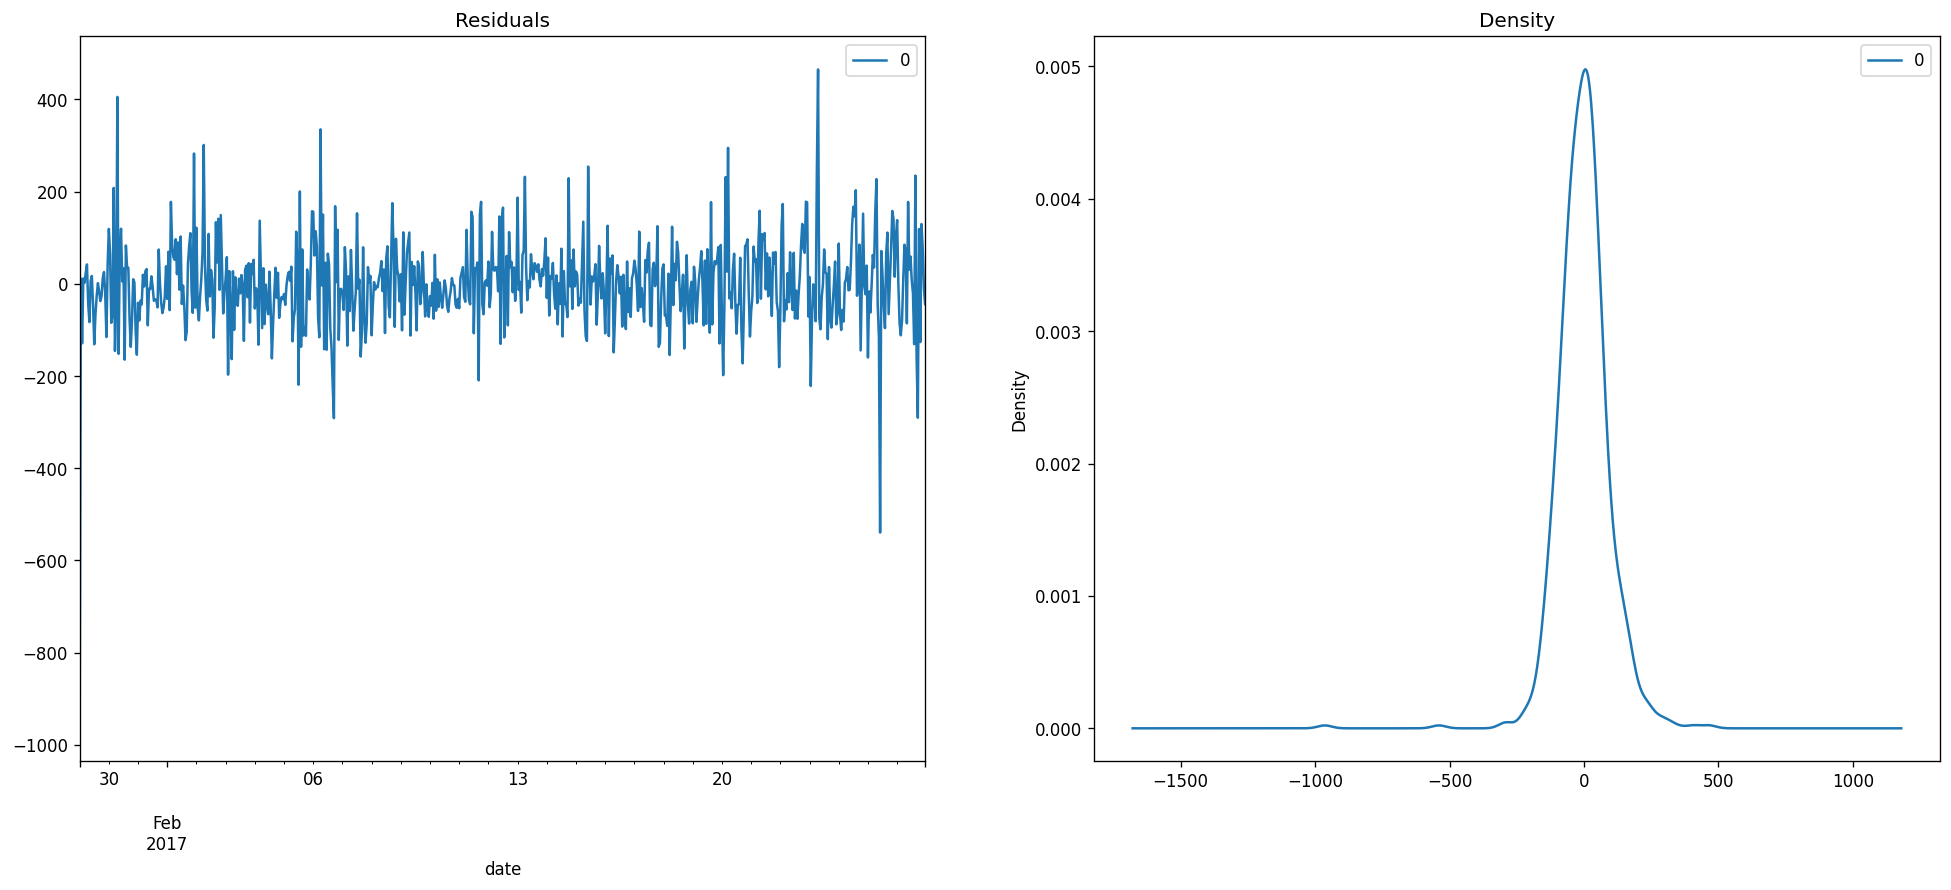

In [9]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

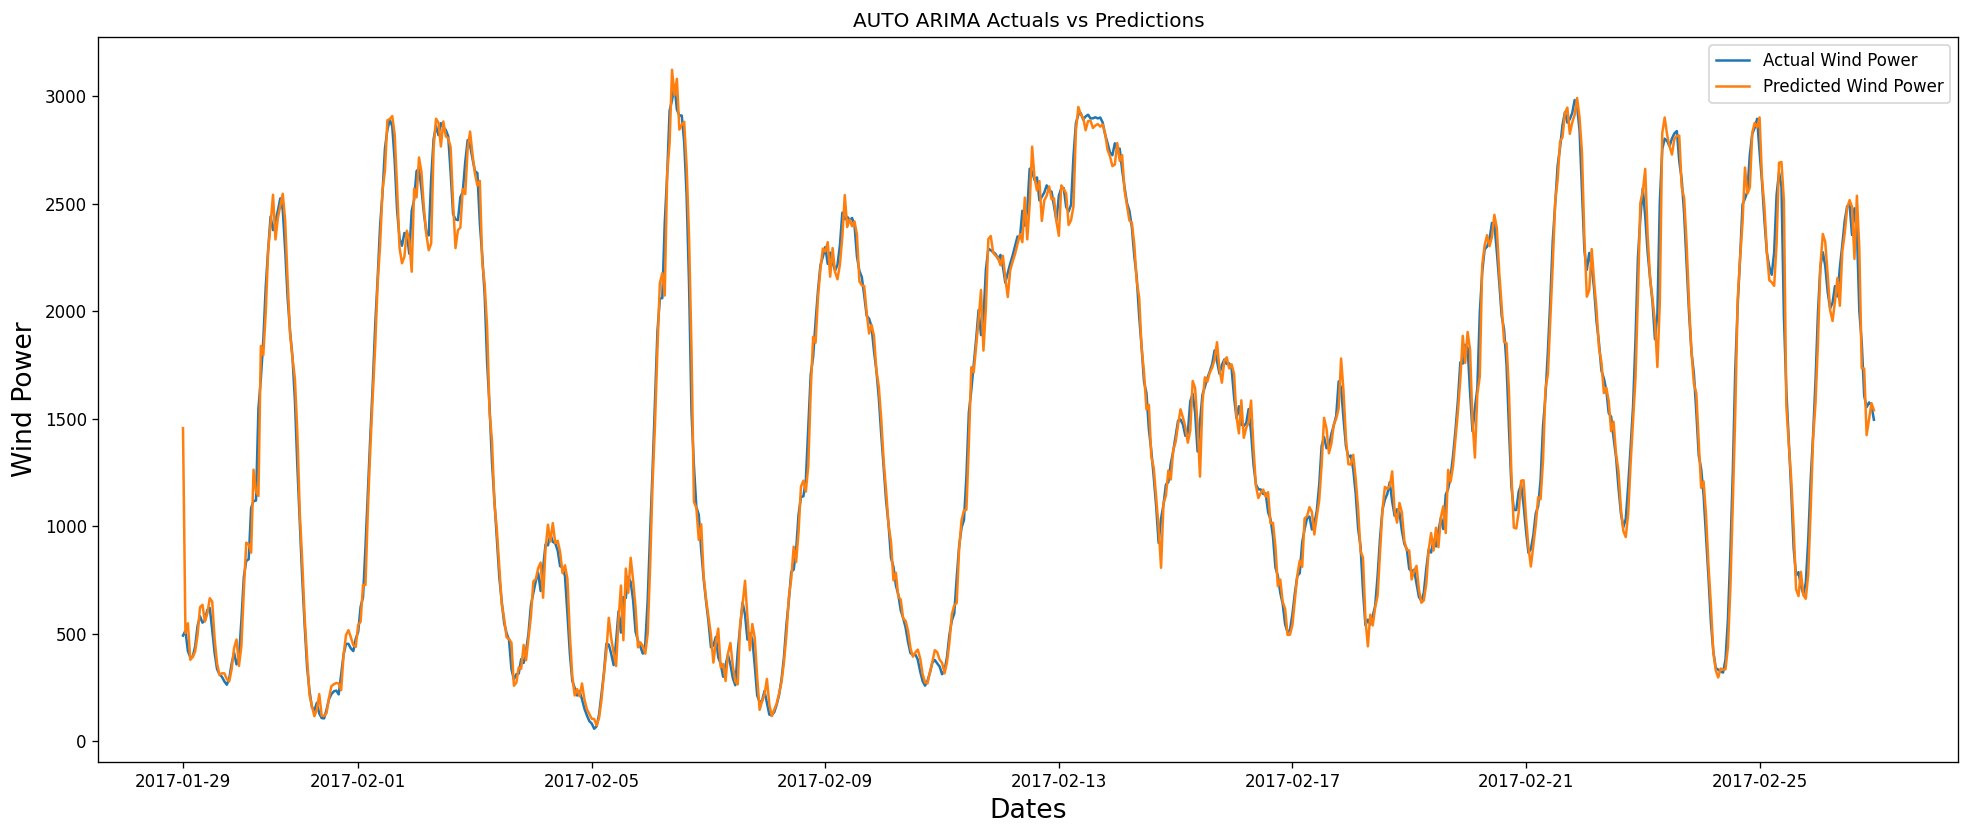

In [8]:
# Actual vs Fitted
# ARIMA model predictions.
plt.rcParams.update({'figure.figsize':(20,8), 'figure.dpi':120})

plt.title('AUTO ARIMA Actuals vs Predictions')
plt.xlabel('Dates',fontsize=16)
plt.ylabel('Wind Power', fontsize=16)
plt.plot(data, label= 'Actual Wind Power')
plt.plot(model_fit.fittedvalues, label= 'Predicted Wind Power')
plt.legend()
plt.show()

In [11]:
# Accuracy metrics
def forecast_accuracy(y_hat, y):
    mape = np.mean(np.abs(y_hat - y)/np.abs(y))
    mae = np.mean(np.abs(y_hat - y))
    rmse = np.mean((y_hat - y)**2)**.5
    return({'mape':mape, 'mae': mae, 'rmse':rmse})

forecast_accuracy(data.avg_wind_pwr, model_fit.fittedvalues)

{'mae': 67.46914600253827,
 'mape': 0.0659335963163756,
 'rmse': 96.81964930194052}

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


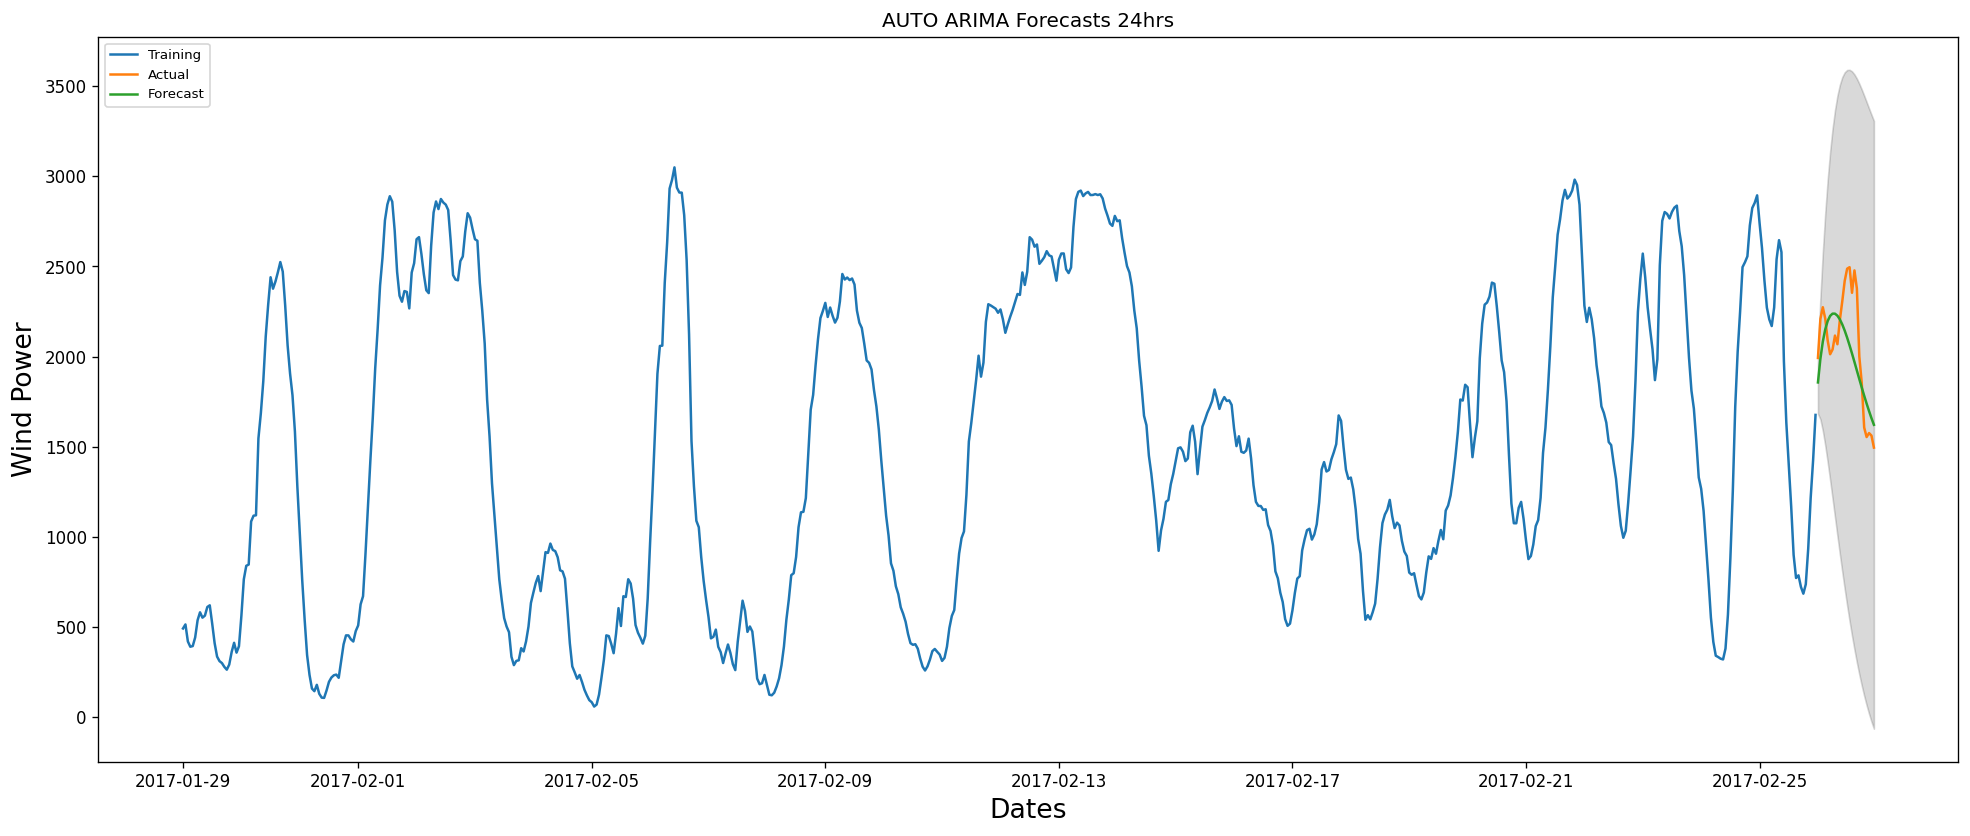

In [12]:
# AUTO ARIMA forecasts (24 hrs ahead)
# forecasting future

# Create Training and Test
train = data.avg_wind_pwr[:672]
test = data.avg_wind_pwr[672:]

# Build Model
model = ARIMA(train, order=(3, 0, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(24, alpha=0.05)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.rcParams.update({'figure.figsize':(20,8), 'figure.dpi':120})
plt.title('AUTO ARIMA Forecasts 24hrs')
plt.xlabel('Dates',fontsize=16)
plt.ylabel('Wind Power', fontsize=16)

plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)


plt.legend(loc='upper left', fontsize=8)
plt.show()

In [13]:
# 24hrs ahead forecast accuracy.
forecast_accuracy(fc, test)

{'mae': 199.4921967556854,
 'mape': 0.09315464117413051,
 'rmse': 239.01707472766503}